In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
#importing required packages
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
#importing the data
df = pd.read_csv('C:/Users/Akhil/Documents/Agri_Data final.csv')
df


District_Name       Season       Crop    N kg/ha   P  kg/ha   K  kg/ha  \
0         ADILABAD  Kharif       Arhar/Tur  25.399955  44.023330  47.866532   
1         ADILABAD  Kharif       Arhar/Tur  25.942129  43.686642  46.978921   
2         ADILABAD  Rabi         Arhar/Tur  25.481752  44.183059  47.628207   
3         ADILABAD  Kharif       Arhar/Tur  29.236268  43.543630  48.151850   
4         ADILABAD  Rabi         Arhar/Tur  27.062090  44.683242  48.497706   
...            ...          ...        ...        ...        ...        ...   
4915      WARANGAL  Rabi             Wheat  60.324727  29.907642  28.842461   
4916      WARANGAL  Rabi             Wheat  60.077498  30.760258  30.008775   
4917      WARANGAL  Rabi             Wheat  60.527319  30.894878  29.131273   
4918      WARANGAL  Rabi             Wheat  60.301643  29.267801  28.669416   
4919      WARANGAL  Rabi             Wheat  59.304489  29.147869  30.515483   

            ph  Humidity_Min  Humidity_Max  Humidity_around  Rainfall  \
0     7.109764          29.1          41.2            35.15     798.6   
1     7.419597          21.1          40.3            30.70    1104.0   
2     6.686975          25.4          49.4            37.40     985.8   
3     7.505164          15.8          47.2            31.50     816.0   
4     7.435820          26.1          61.1            43.60     967.0   
...        ...           ...           ...              ...       ...   
4915  6.966914          30.0          79.5            54.75    1280.0   
4916  6.792731          15.7          40.6            28.15    1007.6   
4917  6.107228          34.5          58.2            46.35     983.0   
4918  6.253218          45.1          87.6            66.35     846.6   
4919  6.492336          31.9          89.5            60.70     636.6   

      Temp_around   Area  Production  
0       36.388150  32200      1100.0  
1       38.384425  35900     12700.0  
2       39.089421    100       100.0  
3       38.594861  38996      9437.0  
4       40.990483    767       186.0  
...           ...    ...         ...  
4915    22.171909     51        30.0  
4916    23.613905     45        24.0  
4917    22.291382     36        30.0  
4918    24.048036     45        42.0  
4919    21.400858     20        26.0  

[4920 rows x 14 columns]

In [3]:
#descriptive statistics
pandas_profiling.ProfileReport(df)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.isna().sum()

District_Name       0
Season              0
Crop                0
N kg/ha             0
P  kg/ha            0
K  kg/ha            0
ph                  0
Humidity_Min        0
Humidity_Max        0
Humidity_around     0
Rainfall            2
Temp_around         0
Area                0
Production         34
dtype: int64

In [5]:
df = df.drop(["Humidity_Max","Humidity_Min"], axis=1)


<AxesSubplot:xlabel='Production'>

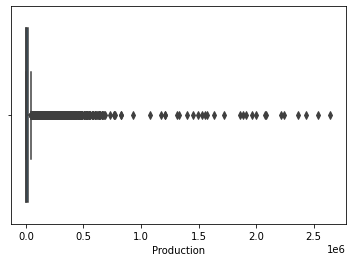

In [9]:
import seaborn as sns
sns.boxplot(df.Production)

In [7]:
%matplotlib inline

<AxesSubplot:xlabel='Rainfall'>

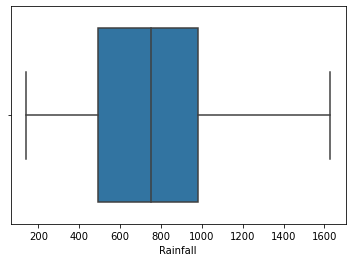

In [8]:
import seaborn as sns 
sns.boxplot(df.Rainfall)

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["Rainfall"] = pd.DataFrame(median_imputer.fit_transform(df[["Rainfall"]]))
df["Rainfall"].isna().sum() 

0

In [12]:
# Median Imputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["Production"] = pd.DataFrame(median_imputer.fit_transform(df[["Production"]]))
df["Production"].isna().sum()

0

In [13]:
df.isna().sum()

District_Name      0
Season             0
Crop               0
N kg/ha            0
P  kg/ha           0
K  kg/ha           0
ph                 0
Humidity_around    0
Rainfall           0
Temp_around        0
Area               0
Production         0
dtype: int64

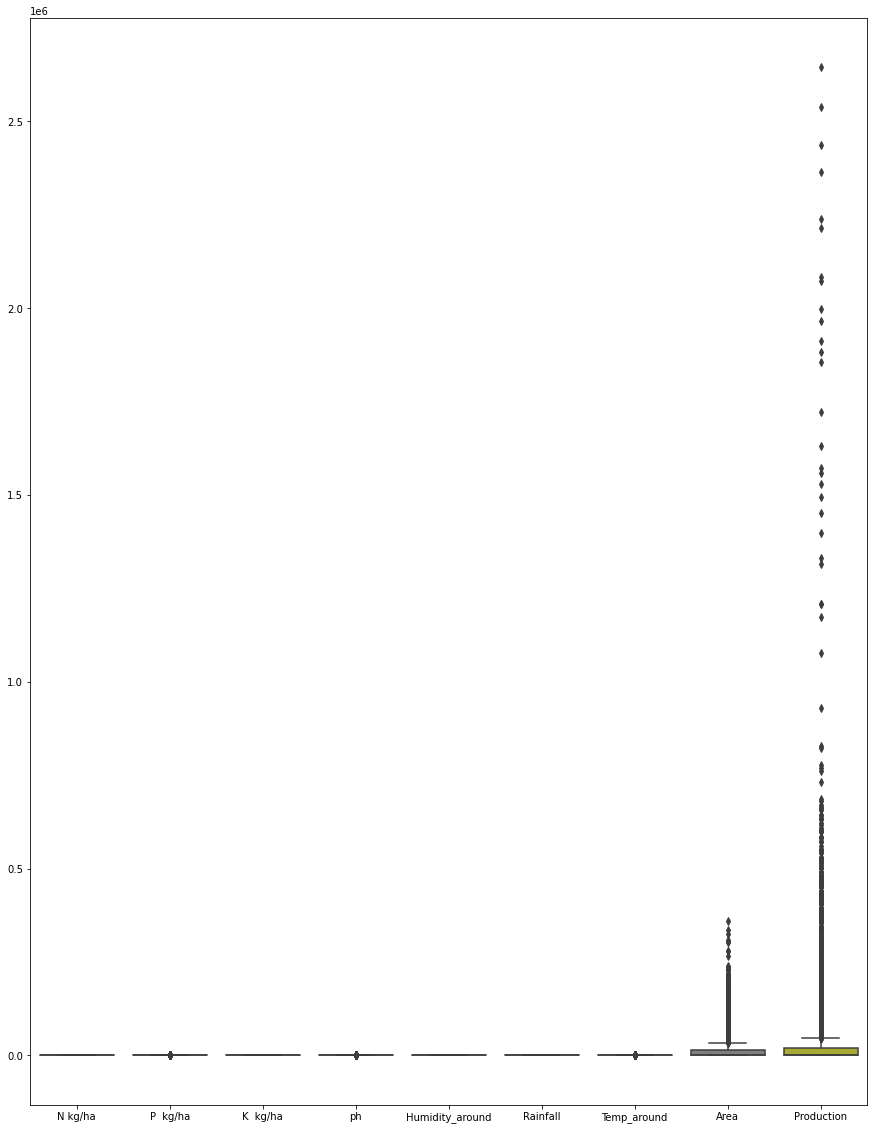

In [14]:
fig=plt.figure(figsize=(15,20))
sns.boxplot(data=df)
plt.show()

In [15]:
#replacing outliers by winsorization technique
!pip install feature_engine

In [16]:
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='iqr', tail='both',fold=1.5,variables=['Rainfall','Production','Area','ph','Temp_around','P  kg/ha'])
df_t=winsor.fit_transform(df[['Rainfall','Area','ph','Temp_around','P  kg/ha','Production']])

In [17]:
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder()

In [18]:
 
df["Season"]= label_encoder.fit_transform(df["Season"]) 
df["District_Name"]= label_encoder.fit_transform(df["District_Name"]) 

In [19]:
df

District_Name  Season       Crop    N kg/ha   P  kg/ha   K  kg/ha  \
0                 0       0  Arhar/Tur  25.399955  44.023330  47.866532   
1                 0       0  Arhar/Tur  25.942129  43.686642  46.978921   
2                 0       1  Arhar/Tur  25.481752  44.183059  47.628207   
3                 0       0  Arhar/Tur  29.236268  43.543630  48.151850   
4                 0       1  Arhar/Tur  27.062090  44.683242  48.497706   
...             ...     ...        ...        ...        ...        ...   
4915              9       1      Wheat  60.324727  29.907642  28.842461   
4916              9       1      Wheat  60.077498  30.760258  30.008775   
4917              9       1      Wheat  60.527319  30.894878  29.131273   
4918              9       1      Wheat  60.301643  29.267801  28.669416   
4919              9       1      Wheat  59.304489  29.147869  30.515483   

            ph  Humidity_around  Rainfall  Temp_around   Area  Production  
0     7.109764            35.15     798.6    36.388150  32200      1100.0  
1     7.419597            30.70    1104.0    38.384425  35900     12700.0  
2     6.686975            37.40     985.8    39.089421    100       100.0  
3     7.505164            31.50     816.0    38.594861  38996      9437.0  
4     7.435820            43.60     967.0    40.990483    767       186.0  
...        ...              ...       ...          ...    ...         ...  
4915  6.966914            54.75    1280.0    22.171909     51        30.0  
4916  6.792731            28.15    1007.6    23.613905     45        24.0  
4917  6.107228            46.35     983.0    22.291382     36        30.0  
4918  6.253218            66.35     846.6    24.048036     45        42.0  
4919  6.492336            60.70     636.6    21.400858     20        26.0  

[4920 rows x 12 columns]

In [20]:
df.isna().sum()

District_Name      0
Season             0
Crop               0
N kg/ha            0
P  kg/ha           0
K  kg/ha           0
ph                 0
Humidity_around    0
Rainfall           0
Temp_around        0
Area               0
Production         0
dtype: int64

In [21]:
#Normalizing The data
std_scale=StandardScaler()
std_scale
StandardScaler(copy=True,with_mean=True,with_std=True)
df['Rainfall']=std_scale.fit_transform(df[['Rainfall']])
df['Temp_around']=std_scale.fit_transform(df[['Temp_around']])
df['Humidity_around']=std_scale.fit_transform(df[['Humidity_around']])
df['N kg/ha']=std_scale.fit_transform(df[['N kg/ha']])
df['P  kg/ha']=std_scale.fit_transform(df[['P  kg/ha']])
df['K  kg/ha']=std_scale.fit_transform(df[['K  kg/ha']])
df['ph']=std_scale.fit_transform(df[['ph']])
df['Area']=std_scale.fit_transform(df[['Area']])
df['Production']=std_scale.fit_transform(df[['Production']])


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating dummies for gender
#df['Gender'] = df['ph'].map({'Male':0, 'Female':1})

# the independent variables set
X = df[['Season','Area','Production','N kg/ha', 'P  kg/ha', 'K  kg/ha',
       'ph', 'Humidity_around', 'Rainfall',
       'Temp_around',]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Crop"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
 for i in range(len(X.columns))]

print(vif_data)


              Crop       VIF
0           Season  1.096664
1             Area  1.499817
2       Production  1.452598
3          N kg/ha  3.986592
4         P  kg/ha  2.685173
5         K  kg/ha  4.964218
6               ph  1.158637
7  Humidity_around  1.004935
8         Rainfall  1.004333
9      Temp_around  1.242244


In [23]:
df

District_Name  Season       Crop   N kg/ha  P  kg/ha  K  kg/ha  \
0                 0       0  Arhar/Tur -0.687820  0.307053  0.839440   
1                 0       0  Arhar/Tur -0.675008  0.290406  0.790427   
2                 0       1  Arhar/Tur -0.685888  0.314951  0.826280   
3                 0       0  Arhar/Tur -0.597163  0.283334  0.855195   
4                 0       1  Arhar/Tur -0.648542  0.339682  0.874292   
...             ...     ...        ...       ...       ...       ...   
4915              9       1      Wheat  0.137504 -0.390893 -0.211045   
4916              9       1      Wheat  0.131662 -0.348736 -0.146643   
4917              9       1      Wheat  0.142292 -0.342079 -0.195097   
4918              9       1      Wheat  0.136958 -0.422530 -0.220600   
4919              9       1      Wheat  0.113394 -0.428460 -0.118663   

            ph  Humidity_around  Rainfall  Temp_around      Area  Production  
0     0.861380        -1.369586  0.125692     1.959076  0.454469   -0.274350  
1     1.203643        -1.613951  1.120263     2.354185  0.559301   -0.203369  
2     0.394337        -1.246031  0.735331     2.493720 -0.455021   -0.280469  
3     1.298167        -1.570021  0.182357     2.395835  0.647020   -0.223335  
4     1.221565        -0.905567  0.674106     2.869984 -0.436123   -0.279943  
...        ...              ...       ...          ...       ...         ...  
4915  0.703578        -0.293281  1.693428    -0.854645 -0.456410   -0.280897  
4916  0.511163        -1.753981  0.806325    -0.569241 -0.456580   -0.280934  
4917 -0.246093        -0.754554  0.726212    -0.830999 -0.456835   -0.280897  
4918 -0.084822         0.343716  0.282009    -0.483317 -0.456580   -0.280824  
4919  0.179325         0.033455 -0.401880    -1.007254 -0.457288   -0.280922  

[4920 rows x 12 columns]

In [24]:
X = df.drop(columns = ['Crop'])
y = df['Crop']

In [25]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
# scaling the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# fitting data to model
#logistic  regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.9024390243902439
Test Accuracy of Logistic Regression Model is 0.9154471544715447


In [28]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[51,  0,  0, ...,  0,  0,  0],
       [ 0, 37,  0, ...,  0,  0,  1],
       [ 0,  0,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 21,  0,  0],
       [ 0,  0,  0, ...,  0, 46,  0],
       [ 0,  0,  0, ...,  0,  0, 16]], dtype=int64)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
#knn 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.8520325203252033
Test Accuracy of KNN Model is 0.7634146341463415


In [30]:
from sklearn.svm import SVC
#svc
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.9105691056910569
Test Accuracy of SVC Model is 0.8943089430894309


In [31]:
from sklearn.tree import DecisionTreeClassifier
#decision tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.9772357723577236


In [32]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [33]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.9788617886178861


In [34]:
#grid
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.9937669376693767
Test Accuracy of Decesion Tree Model is 0.9813008130081301


In [35]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[51,  0,  0, ...,  0,  0,  0],
       [ 0, 42,  0, ...,  0,  0,  0],
       [ 0,  0,  5, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 26,  0,  0],
       [ 0,  0,  0, ...,  0, 61,  0],
       [ 0,  0,  0, ...,  0,  0, 20]], dtype=int64)

In [36]:
# classification report

print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                Arhar/Tur       1.00      1.00      1.00        51
                    Bajra       1.00      0.98      0.99        43
Beans & Mutter(Vegetable)       1.00      0.83      0.91         6
                   Bhindi       1.00      1.00      1.00         1
             Bottle Gourd       1.00      1.00      1.00         3
                  Brinjal       1.00      1.00      1.00         5
                  Cabbage       0.71      1.00      0.83         5
              Castor seed       0.98      0.94      0.96        53
                Coriander       1.00      1.00      1.00        23
             Cotton(lint)       0.98      1.00      0.99        40
            Cowpea(Lobia)       0.70      0.78      0.74         9
                 Cucumber       1.00      1.00      1.00         3
             Dry chillies       1.00      1.00      1.00        62
               Dry ginger       1.00      1.00      1.00     

In [45]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 150)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.9466124661246612
Test Accuracy of Random Forest Model is 0.9276422764227642


In [46]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[51,  0,  0, ...,  0,  0,  0],
       [ 0, 43,  0, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  1,  0,  0],
       ...,
       [ 0,  0,  0, ..., 26,  0,  0],
       [ 0,  0,  0, ...,  0, 61,  0],
       [ 0,  0,  0, ...,  0,  0, 16]], dtype=int64)

In [47]:
# classification report

print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                Arhar/Tur       1.00      1.00      1.00        51
                    Bajra       1.00      1.00      1.00        43
Beans & Mutter(Vegetable)       0.75      0.50      0.60         6
                   Bhindi       1.00      1.00      1.00         1
             Bottle Gourd       1.00      1.00      1.00         3
                  Brinjal       1.00      1.00      1.00         5
                  Cabbage       1.00      0.80      0.89         5
              Castor seed       1.00      1.00      1.00        53
                Coriander       1.00      1.00      1.00        23
             Cotton(lint)       1.00      1.00      1.00        40
            Cowpea(Lobia)       1.00      0.67      0.80         9
                 Cucumber       1.00      1.00      1.00         3
             Dry chillies       1.00      1.00      1.00        62
               Dry ginger       0.76      1.00      0.87     

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [90, 120],
    'learning_rate' : [ 0.01, 0.1],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=10,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [90, 120]},
             verbose=1)

In [49]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 90}
0.9878048780487806


In [50]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate =0.0001, n_estimators = 960)
ada.fit(X_train, y_train)

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Ada Boost Model is {ada_train_acc}")
print(f"Test Accuracy of Ada Boost Model is {ada_test_acc}")

Training Accuracy of Ada Boost Model is 0.9962059620596206
Test Accuracy of Ada Boost Model is 0.9276422764227642


In [51]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001],
    'n_estimators': [100]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100]},
             verbose=1)

In [59]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 150)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 1.0
Test Accuracy of Gradient Boosting Classifier Model is 0.9666666666666667


In [52]:
#stohastic gradient boosting
sgbc = GradientBoostingClassifier(learning_rate = 0.001, subsample = 0.9, max_features = 0.65, loss = 'deviance',
                                  n_estimators = 150)

sgbc.fit(X_train, y_train)

y_pred = sgbc.predict(X_test)

sgbc_train_acc = accuracy_score(y_train, sgbc.predict(X_train))
sgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SGB Model is {sgbc_train_acc}")
print(f"Test Accuracy of SGB Model is {sgbc_test_acc}")

Training Accuracy of SGB Model is 0.962059620596206
Test Accuracy of SGB Model is 0.9260162601626016


In [53]:
!pip install xgboost

In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = .1, max_depth = 3, n_estimators = 750)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")

[13:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy of XGB Model is 0.9254742547425474
Test Accuracy of XGB Model is 0.9252032520325203


In [55]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[51,  0,  0, ...,  0,  0,  0],
       [ 0, 38,  0, ...,  0,  0,  1],
       [ 0,  0,  5, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 21,  0,  0],
       [ 0,  0,  0, ...,  0, 44,  0],
       [ 0,  0,  0, ...,  0,  0, 19]], dtype=int64)

In [56]:
# classification report

print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                Arhar/Tur       1.00      1.00      1.00        51
                    Bajra       0.93      0.88      0.90        43
Beans & Mutter(Vegetable)       0.83      0.83      0.83         6
                   Bhindi       1.00      1.00      1.00         1
             Bottle Gourd       0.00      0.00      0.00         3
                  Brinjal       1.00      1.00      1.00         5
                  Cabbage       1.00      0.60      0.75         5
              Castor seed       0.96      0.98      0.97        53
                Coriander       1.00      1.00      1.00        23
             Cotton(lint)       0.95      0.97      0.96        40
            Cowpea(Lobia)       0.73      0.89      0.80         9
                 Cucumber       1.00      1.00      1.00         3
             Dry chillies       1.00      1.00      1.00        62
               Dry ginger       1.00      1.00      1.00     

In [60]:
models = [ 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost','gradient boosting', 'SGB', 'XgBoost']
scores = [ knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc,gb_test_acc , sgbc_test_acc, xgb_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

Model     Score
2      Decision Tree  0.981301
5  gradient boosting  0.966667
3      Random Forest  0.927642
4          Ada Boost  0.927642
6                SGB  0.926016
7            XgBoost  0.925203
1                SVC  0.894309
0                KNN  0.763415

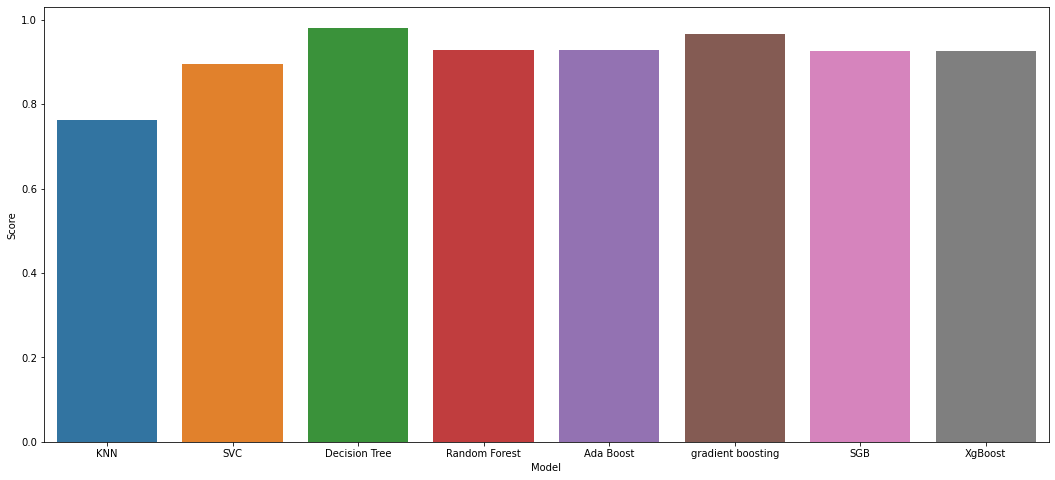

In [61]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

In [ ]:
df.columns